In [1]:
import tensorflow as tf
from tensorflow.keras import layers

codings_size = 30
generator = tf.keras.Sequential([
    layers.Dense(100, activation="selu", input_shape=[codings_size]),
    layers.Dense(150, activation="selu"),
    layers.Dense(28*28, activation="sigmoid"),
    layers.Reshape([28,28])
])

In [3]:
discriminator = tf.keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(150, activation='selu'),
    layers.Dense(100, activation='selu'),
    layers.Dense(1, activation='sigmoid')
])
gan = tf.keras.Sequential([generator, discriminator])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train = X_train.astype('float32')
X_train = X_train.reshape(60000, 28, 28)
print(X_train.shape)

(60000, 28, 28)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

In [10]:
import tensorflow as tf
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)
tf.executing_eagerly()

True

In [18]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50, show_every=250):
    generator, discriminator = gan.layers
    iter_count = 0
    for epoch in range(n_epochs):
        for X_batch in dataset:
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
            if (iter_count % show_every == 0):
                print('Iter: {}'.format(iter_count))
                imgs_numpy = generated_images
                show_images(imgs_numpy[0:16])
                plt.show()
                print()
            iter_count += 1

Iter: 0


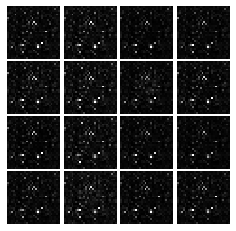


Iter: 250


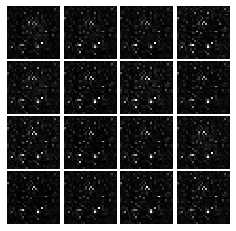


Iter: 500


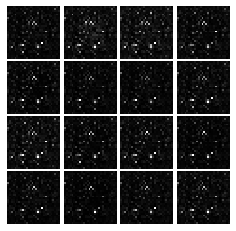


Iter: 750


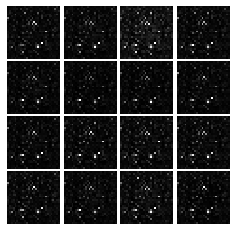


Iter: 1000


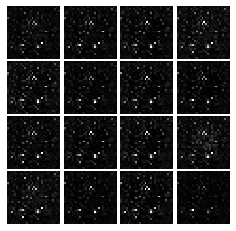


Iter: 1250


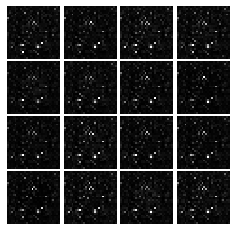


Iter: 1500


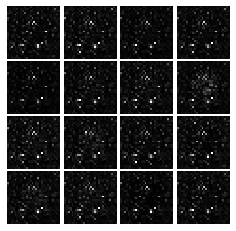


Iter: 1750


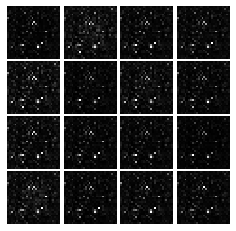


Iter: 2000


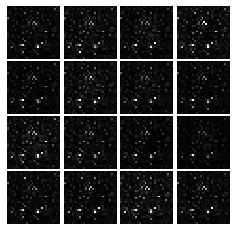


Iter: 2250


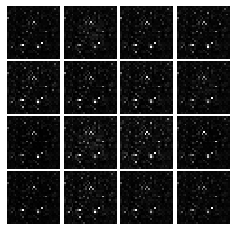


Iter: 2500


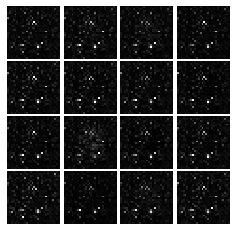


Iter: 2750


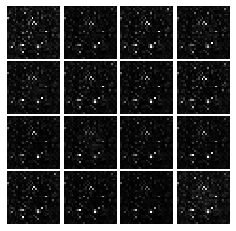


Iter: 3000


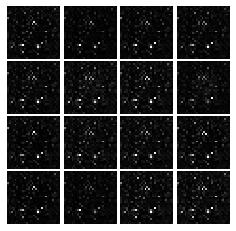


Iter: 3250


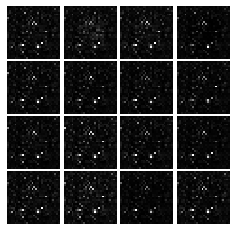


Iter: 3500


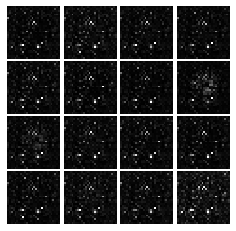


Iter: 3750


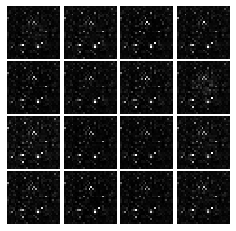


Iter: 4000


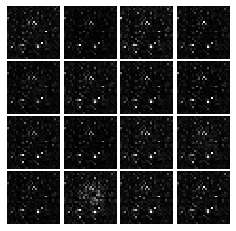


Iter: 4250


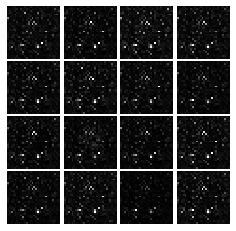


Iter: 4500


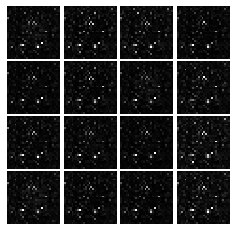


Iter: 4750


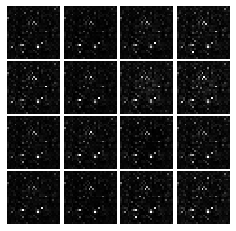


Iter: 5000


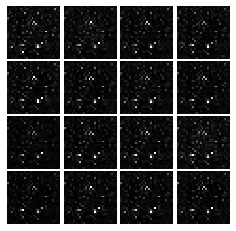


Iter: 5250


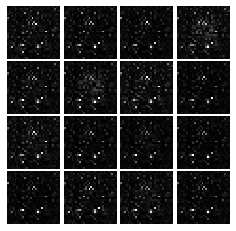


Iter: 5500


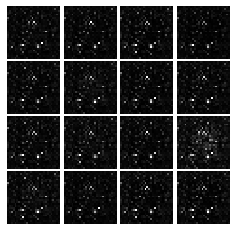


Iter: 5750


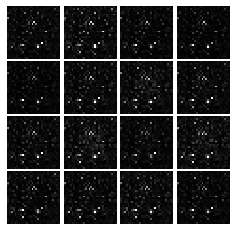


Iter: 6000


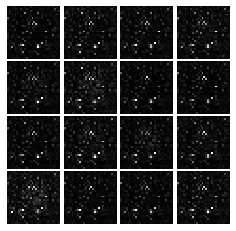


Iter: 6250


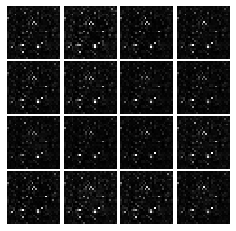


Iter: 6500


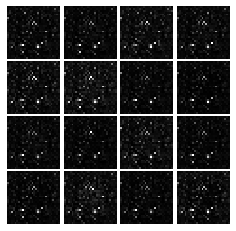


Iter: 6750


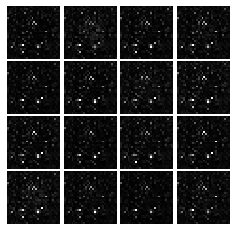


Iter: 7000


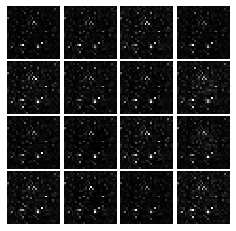


Iter: 7250


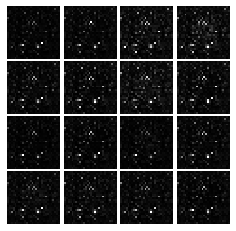


Iter: 7500


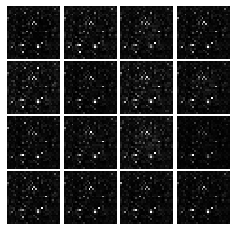


Iter: 7750


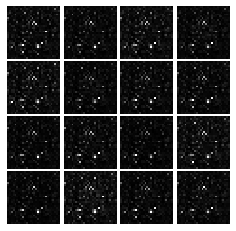


Iter: 8000


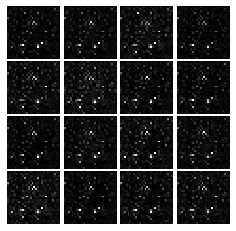


Iter: 8250


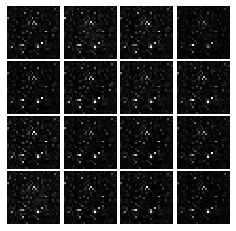


Iter: 8500


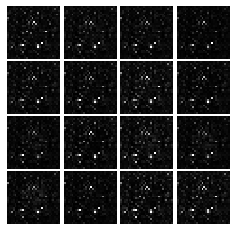


Iter: 8750


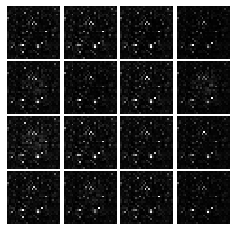


Iter: 9000


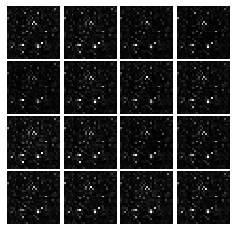


Iter: 9250


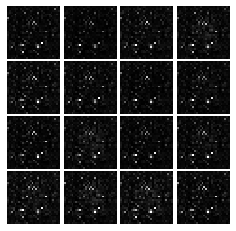


Iter: 9500


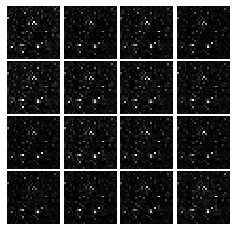


Iter: 9750


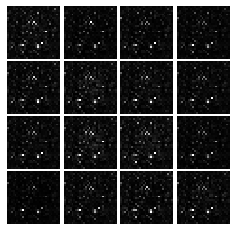


Iter: 10000


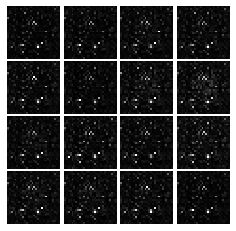


Iter: 10250


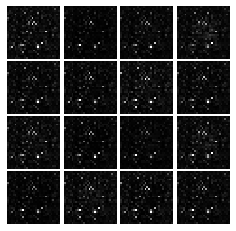


Iter: 10500


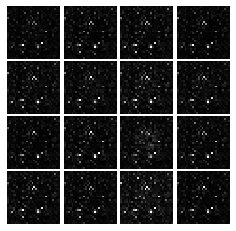


Iter: 10750


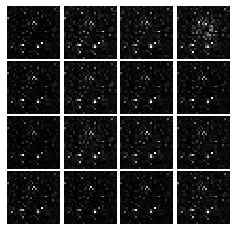


Iter: 11000


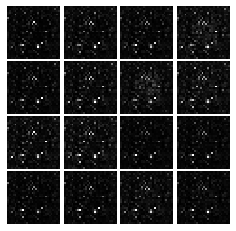


Iter: 11250


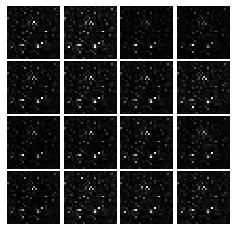


Iter: 11500


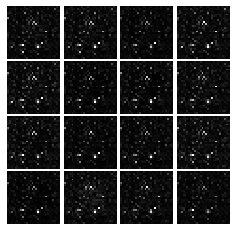


Iter: 11750


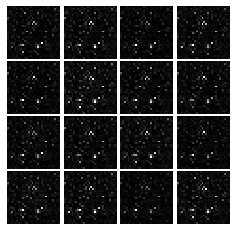


Iter: 12000


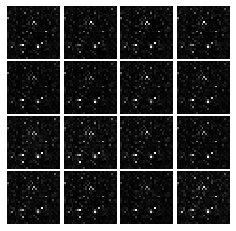


Iter: 12250


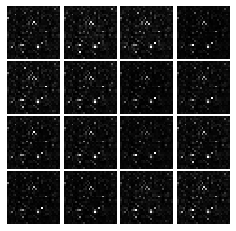


Iter: 12500


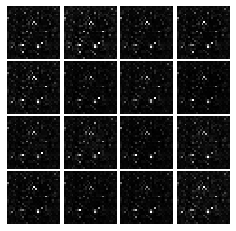


Iter: 12750


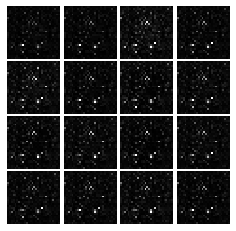


Iter: 13000


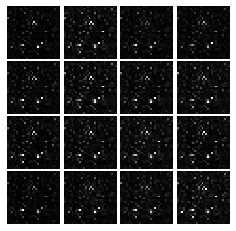


Iter: 13250


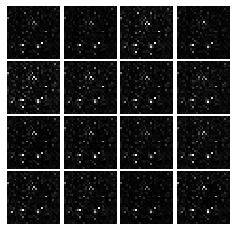


Iter: 13500


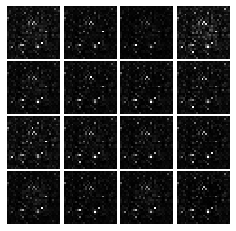


Iter: 13750


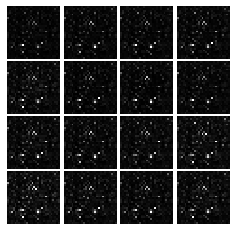


Iter: 14000


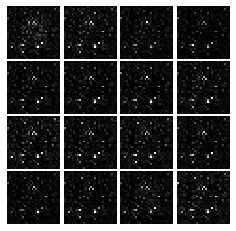


Iter: 14250


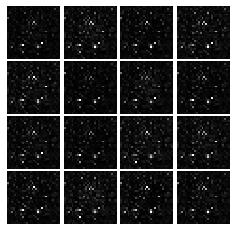


Iter: 14500


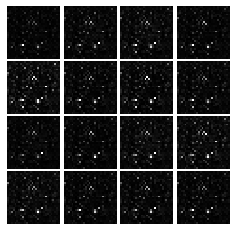


Iter: 14750


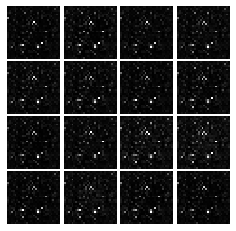


Iter: 15000


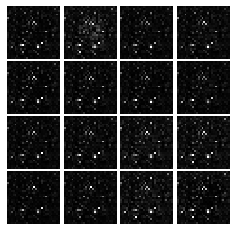


Iter: 15250


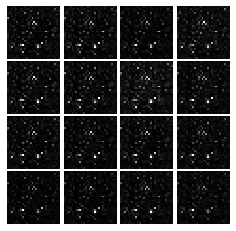


Iter: 15500


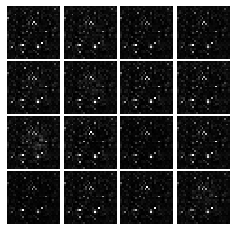


Iter: 15750


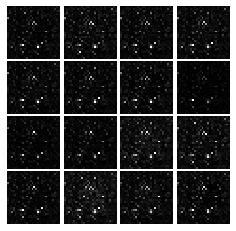


Iter: 16000


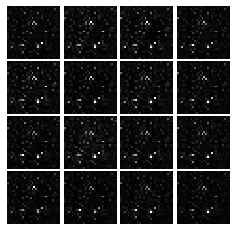


Iter: 16250


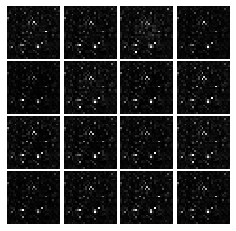


Iter: 16500


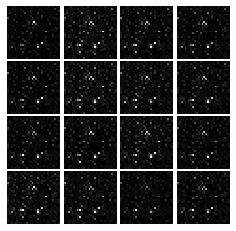


Iter: 16750


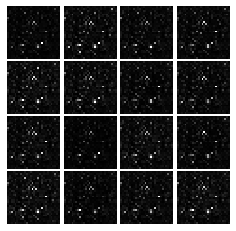


Iter: 17000


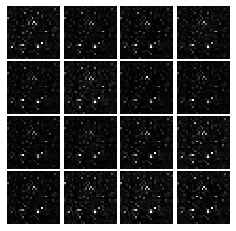


Iter: 17250


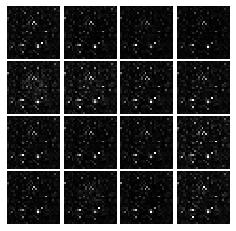


Iter: 17500


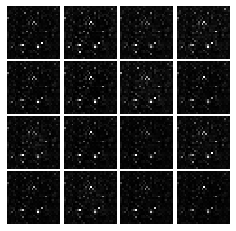


Iter: 17750


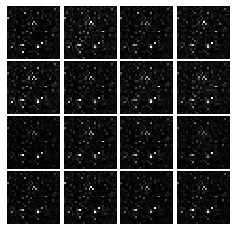


Iter: 18000


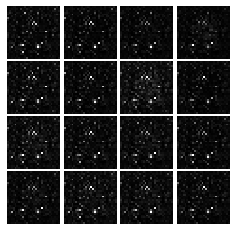


Iter: 18250


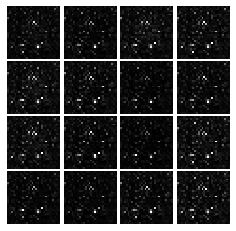


Iter: 18500


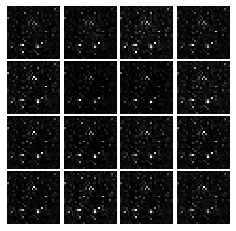


Iter: 18750


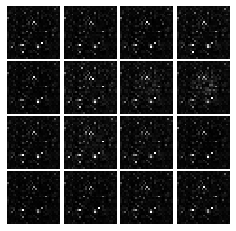


Iter: 19000


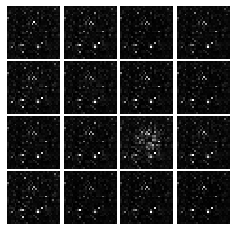


Iter: 19250


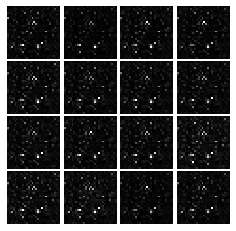


Iter: 19500


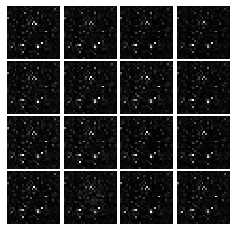


Iter: 19750


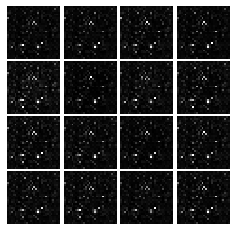


Iter: 20000


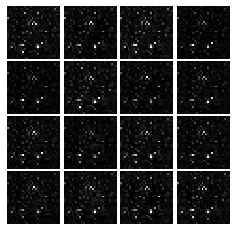


Iter: 20250


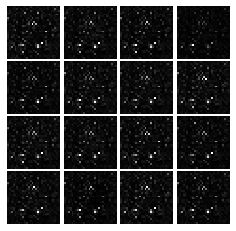


Iter: 20500


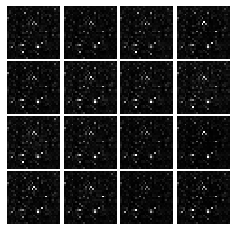


Iter: 20750


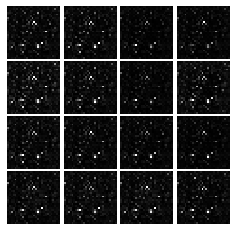


Iter: 21000


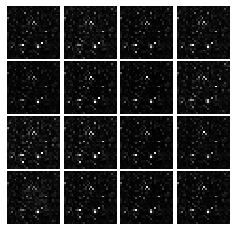


Iter: 21250


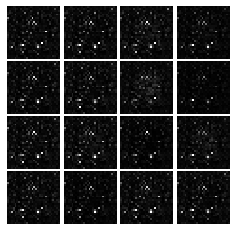


Iter: 21500


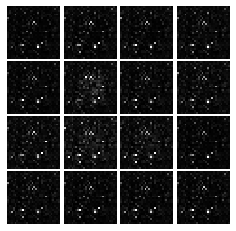


Iter: 21750


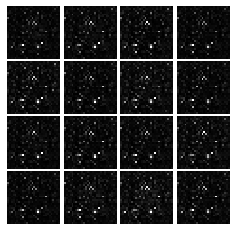


Iter: 22000


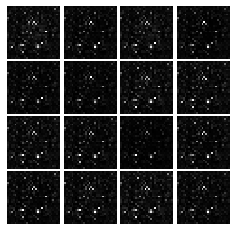


Iter: 22250


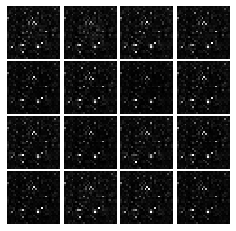


Iter: 22500


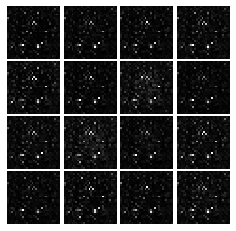


Iter: 22750


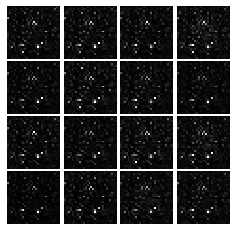


Iter: 23000


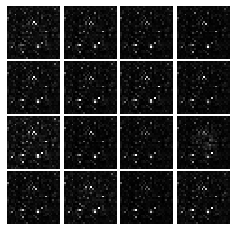


Iter: 23250


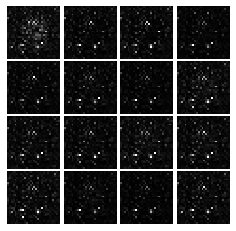


Iter: 23500


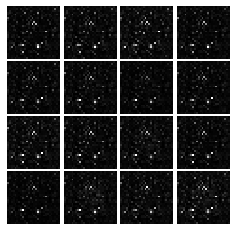


Iter: 23750


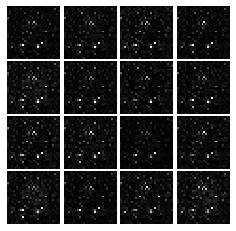


Iter: 24000


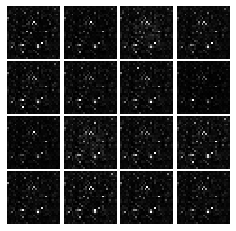


Iter: 24250


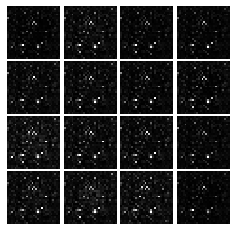


Iter: 24500


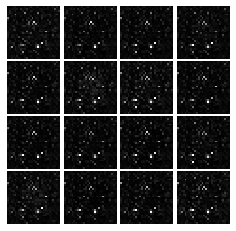


Iter: 24750


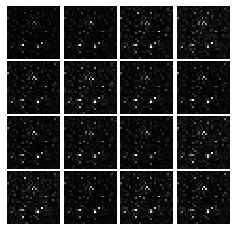


Iter: 25000


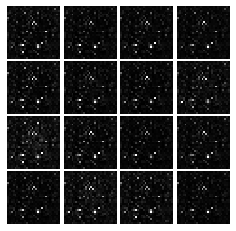


Iter: 25250


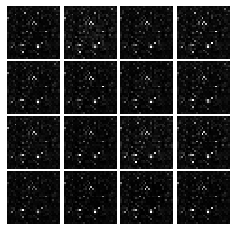


Iter: 25500


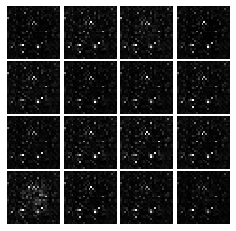


Iter: 25750


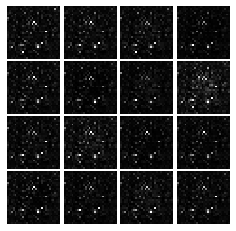


Iter: 26000


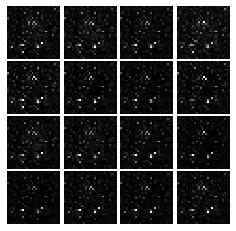


Iter: 26250


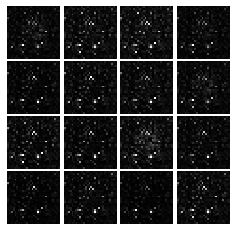


Iter: 26500


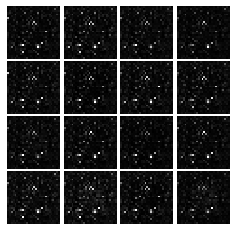


Iter: 26750


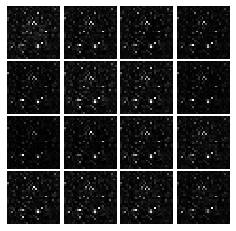


Iter: 27000


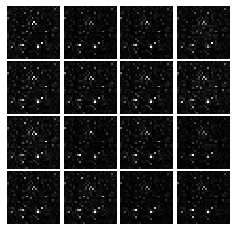


Iter: 27250


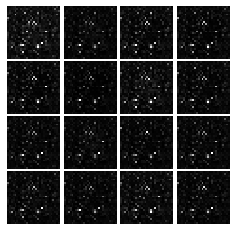


Iter: 27500


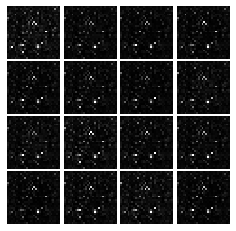


Iter: 27750


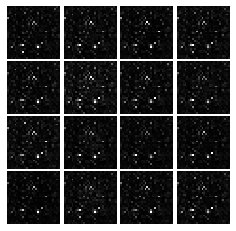


Iter: 28000


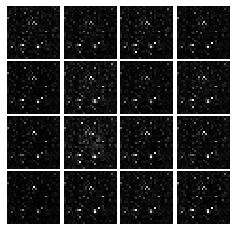


Iter: 28250


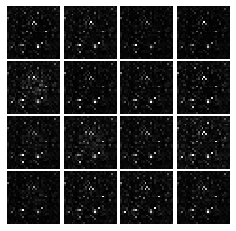


Iter: 28500


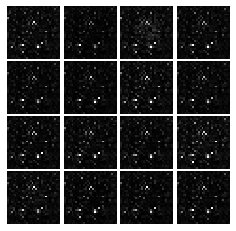


Iter: 28750


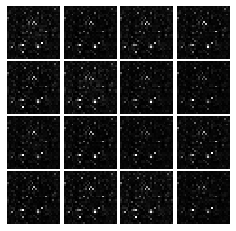


Iter: 29000


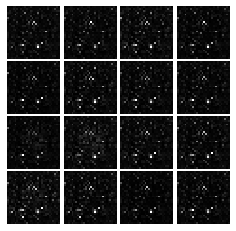


Iter: 29250


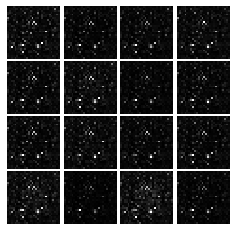

KeyboardInterrupt: 

In [19]:
train_gan(gan, dataset, batch_size, codings_size)